# Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\halog\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Dataset Load 

In [2]:
X = [[5.1, 3.5],[4.9, 3.0],[5.8, 2.7],[6.0, 3.0],[6.7, 3.1],
     [4.5, 2.3],[6.1, 2.8],[5.2, 3.2],[5.5, 2.6],[5.0, 2.0],
     [8.0, 0.5],[7.5, 0.8],[8.1, -0.1],[2.5, 3.5],[1.0, 3.0],
     [4.5, -1.0],[3.0, -0.5],[5.1, -0.2],[6.0, -1.5],[3.5, -0.1],
    [4.0, 0.0],[6.1, 0.5],[5.4, -0.5],[5.3, 0.3],[5.8, 0.6]]

# Initializing Constants 

In [ ]:
c1 = [3.0,3.0]
c2 = [2.0,2.0]
minx1= min([x[0] for x in X])
maxx1= max([x[0] for x in X])
minx2= min([x[1] for x in X])
maxx2= max([x[1] for x in X])

# Euclidian Distance 

In [4]:
def euclidean_distance(x1,y1, x2,y2):
    return np.sqrt((x1-x2)**2 + (y1-y2)**2)

In [5]:
i =0 
c1_current = c1
c2_current = c2
c2_prev = c2
c1_prev = c1
while i<100:
    pt1 = []
    pt2 = []
    for x in X:
        d1 = euclidean_distance(c1_current[0], c1_current[1], x[0], x[1])
        d2 = euclidean_distance(c2_current[0], c2_current[1], x[0], x[1])
        if d1 < d2:
            pt1.append(x)
        else:
            pt2.append(x)
    c1_prev = c1_current
    c2_prev = c2_current
    if len(pt1) > 0:
        c1_current = np.mean(pt1, axis=0)
    if len(pt2) > 0:
        c2_current = np.mean(pt2, axis=0)
    if len(pt1) == 0:
        c1_current = [np.random.uniform(minx1, maxx1), np.random.uniform(minx2, maxx2)]
    if len(pt2) == 0:
        c2_current = [np.random.uniform(minx1, maxx1), np.random.uniform(minx2, maxx2)]
    i +=1
    print ("epoch", i)
    print ("c1", c1_current)
    print ("c2", c2_current)
    
    if np.all(c1_current == c1_prev) and np.all(c2_current == c2_prev):
        break
    if euclidean_distance(c1_current[0], c1_current[1], c1_prev[0], c1_prev[1]) < 1e-4 and euclidean_distance(c2_current[0], c2_current[1], c2_prev[0], c2_prev[1]) < 1e-4:
        break




epoch 1
c1 [5.77058824 2.01764706]
c2 [ 4.0625 -0.1   ]
epoch 2
c1 [5.8   2.125]
c2 [ 4.2        -0.05555556]
epoch 3
c1 [5.8   2.125]
c2 [ 4.2        -0.05555556]


In [6]:
# final centroids

print("Final Centroids")
print("Centroid 1: ", c1_current)
print("Centroid 2: ", c2_current)




Final Centroids
Centroid 1:  [5.8   2.125]
Centroid 2:  [ 4.2        -0.05555556]


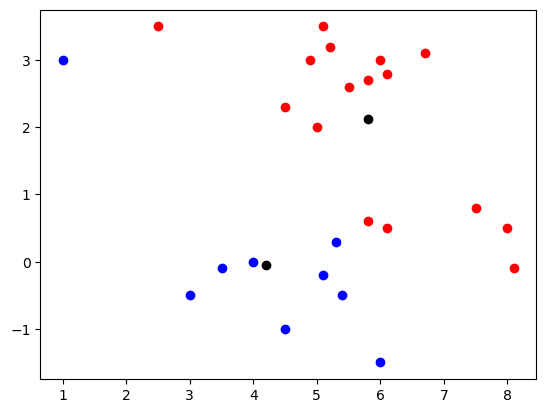

In [7]:

cluster1=[]
cluster2=[]
for x in X:
    d1 = euclidean_distance(c1_current[0], c1_current[1], x[0], x[1])
    d2 = euclidean_distance(c2_current[0], c2_current[1], x[0], x[1])
    if d1 < d2:
        cluster1.append(x)
    else:
        cluster2.append(x)
cluster1 = np.array(cluster1)
cluster2 = np.array(cluster2)
plt.scatter(cluster1[:,0], cluster1[:,1], color='red')
plt.scatter(cluster2[:,0], cluster2[:,1], color='blue')
plt.scatter(c1_current[0], c1_current[1], color='black')
plt.scatter(c2_current[0], c2_current[1], color='black')
plt.show()




In [ ]:
# now random initialization of c1 and c2
minx1= min([x[0] for x in X])
maxx1= max([x[0] for x in X])
minx2= min([x[1] for x in X])
maxx2= max([x[1] for x in X])

c1 = [np.random.uniform(minx1, maxx1), np.random.uniform(minx2, maxx2)]
c2 = [np.random.uniform(minx1, maxx1), np.random.uniform(minx2, maxx2)]

i =0
c1_current = c1
c2_current = c2
c2_prev = c2
c1_prev = c1
while i<100:
    pt1 = []
    pt2 = []
    for x in X:
        d1 = euclidean_distance(c1_current[0], c1_current[1], x[0], x[1])
        d2 = euclidean_distance(c2_current[0], c2_current[1], x[0], x[1])
        if d1 < d2:
            pt1.append(x)
        else:
            pt2.append(x)
    c1_prev = c1_current
    c2_prev = c2_current
    if len(pt1) > 0:
        c1_current = np.mean(pt1, axis=0)
    if len(pt2) > 0:
        c2_current = np.mean(pt2, axis=0)
    if len(pt1) == 0:
        c1_current = [np.random.uniform(minx1, maxx1), np.random.uniform(minx2, maxx2)]
    if len(pt2) == 0:
        c2_current = [np.random.uniform(minx1, maxx1), np.random.uniform(minx2, maxx2)]
    i +=1
    print ("epoch", i)
    print ("c1", c1_current)
    print ("c2", c2_current)
    
    if np.all(c1_current == c1_prev) and np.all(c2_current == c2_prev):
        break
    if euclidean_distance(c1_current[0], c1_current[1], c1_prev[0], c1_prev[1]) < 1e-4 and euclidean_distance(c2_current[0], c2_current[1], c2_prev[0], c2_prev[1]) < 1e-4:
        break




epoch 1
c1 [ 4.98888889 -0.4       ]
c2 [5.35625 2.31875]
epoch 2
c1 [ 5.4        -0.16666667]
c2 [5.06153846 2.73076923]
epoch 3
c1 [ 5.56153846 -0.09230769]
c2 [4.85833333 2.89166667]
epoch 4
c1 [ 5.56153846 -0.09230769]
c2 [4.85833333 2.89166667]


In [ ]:
print("Final Centroids")
print("Centroid 1: ", c1_current)
print("Centroid 2: ", c2_current)

Final Centroids
Centroid 1:  [5.94444444 1.6       ]
Centroid 2:  [3.37142857 0.67142857]


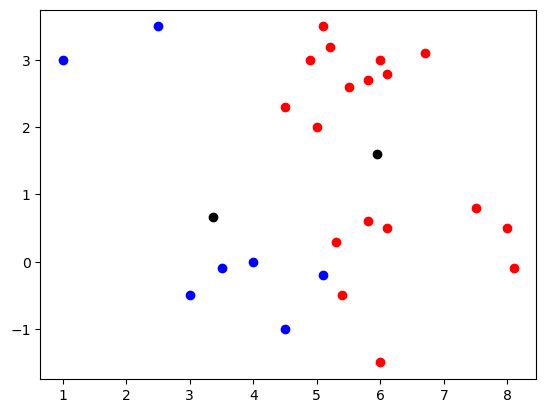

In [ ]:
cluster1=[]
cluster2=[]
for x in X:
    d1 = euclidean_distance(c1_current[0], c1_current[1], x[0], x[1])
    d2 = euclidean_distance(c2_current[0], c2_current[1], x[0], x[1])
    if d1 < d2:
        cluster1.append(x)
    else:
        cluster2.append(x)

cluster1 = np.array(cluster1)
cluster2 = np.array(cluster2)
plt.scatter(cluster1[:,0], cluster1[:,1], color='red')
plt.scatter(cluster2[:,0], cluster2[:,1], color='blue')
plt.scatter(c1_current[0], c1_current[1], color='black')
plt.scatter(c2_current[0], c2_current[1], color='black')
plt.show()

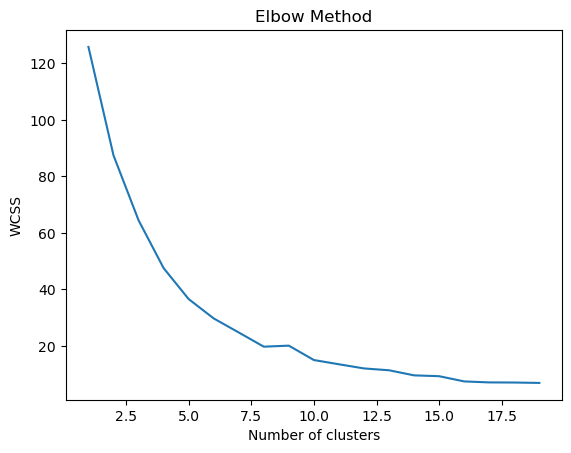

In [ ]:
wcss = []
for k in range(1, 20):
    l1=[]
    for _ in range(100):
        c = []
        for i in range(k):
            c.append([np.random.uniform(minx1, maxx1), np.random.uniform(minx2, maxx2)])
        i =0
        c_current = c
        c_prev = c
        while i<1000:
            pt = []
            for x in X:
                d = []
                for j in range(k):
                    d.append(euclidean_distance(c_current[j][0], c_current[j][1], x[0], x[1]))
                pt.append(np.argmin(d))
            c_prev = c_current
            for j in range(k):
                c_current[j] = np.mean([X[l] for l in range(len(X)) if pt[l] == j], axis=0)
            i +=1
            if np.all(c_current == c_prev):
                break
            if all([euclidean_distance(c_current[j][0], c_current[j][1], c_prev[j][0], c_prev[j][1]) < 1e-4 for j in range(k)]):
                break
        l1.append(sum([euclidean_distance(c_current[pt[l]][0], c_current[pt[l]][1], X[l][0], X[l][1])**2 for l in range(len(X))]))
    l1=np.array(l1)
    wcss.append(l1.mean())
plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



In [54]:

# Perform clustering with the optimal number of clusters 5 and plot the resulting clusters
c = []
for i in range(5):
    c.append([np.random.uniform(minx1, maxx1), np.random.uniform(minx2, maxx2)])
i =0
c_current = c
c_prev = c
while i<100:
    pt = []
    for x in X:
        d = []
        for j in range(5):
            d.append(euclidean_distance(c_current[j][0], c_current[j][1], x[0], x[1]))
        pt.append(np.argmin(d))
    c_prev = c_current
    for j in range(5):
        if len([X[l] for l in range(len(X)) if pt[l] == j]) == 0:
            c_current[j] = [np.random.uniform(minx1, maxx1), np.random.uniform(minx2, maxx2)]
        else:
            c_current[j] = np.mean([X[l] for l in range(len(X)) if pt[l] == j], axis=0)
    i +=1
    if np.all(c_current == c_prev):
        break
    if all([euclidean_distance(c_current[j][0], c_current[j][1], c_prev[j][0], c_prev[j][1]) < 1e-4 for j in range(5)]):
        break

cluster1=[]
cluster2=[]
cluster3=[]
cluster4=[]
cluster5=[]

for x in X:
    d = []
    for j in range(5):
        d.append(euclidean_distance(c_current[j][0], c_current[j][1], x[0], x[1]))
    if np.argmin(d) == 0:
        cluster1.append(x)
    elif np.argmin(d) == 1:
        cluster2.append(x)
    elif np.argmin(d) == 2:
        cluster3.append(x)
    elif np.argmin(d) == 3:
        cluster4.append(x)
    else:
        cluster5.append(x)



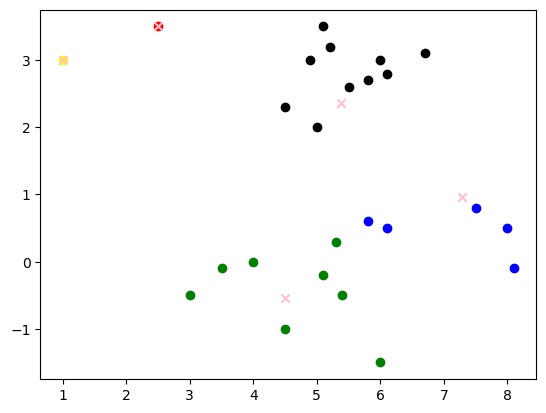

In [55]:

cluster1 = np.array(cluster1)
cluster2 = np.array(cluster2)
cluster3 = np.array(cluster3)
cluster4 = np.array(cluster4)
cluster5 = np.array(cluster5)
plt.scatter(cluster1[:,0], cluster1[:,1], color='red')
plt.scatter(cluster2[:,0], cluster2[:,1], color='blue')
plt.scatter(cluster3[:,0], cluster3[:,1], color='green')
plt.scatter(cluster4[:,0], cluster4[:,1], color='yellow')
plt.scatter(cluster5[:,0], cluster5[:,1], color='black')

for j in range(5):
    plt.scatter(c_current[j][0], c_current[j][1], color='Pink' ,marker='x')
plt.show()


